In [3]:
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk import FreqDist

In [4]:
df=pd.read_csv('data/cleaned_BA_reviews.csv')

In [5]:
df

,date,country,rating,verification,cleaned_reviews
0,2023-02-07,United Kingdom,5,verified,boarding delayed due late arrival incoming fli...
1,2023-02-06,Spain,9,verified,first flight year also first time back england...
2,2023-02-04,United Kingdom,10,verified,husband flying madrid february legal matter ma...
3,2023-01-31,United Kingdom,10,verified,organised boarding process really friendly cre...
4,2023-01-31,United Kingdom,10,verified,outward journey london buenos aire club world ...
...,...,...,...,...,...
995,2018-04-28,Spain,7,verified,madrid london credit due flew club europe crew...
996,2018-04-26,United Kingdom,1,verified,nice gatwick use snokart luggage designed zipp...
997,2018-04-26,Ireland,9,verified,first leg trouble free lounge good staff good ...
998,2018-04-26,United Kingdom,8,verified,flew london budapest british airway massively ...


In [98]:
# extract text from "text" column
text_data = " ".join(df['country'])

# create FreqDist object from text data
fdist = FreqDist(nltk.word_tokenize(text_data))

In [99]:
d = pd.DataFrame({'country': list(fdist.keys()),
                 'Count': list(fdist.values())})
d.head(10)

,country,Count
0,United,732
1,Kingdom,579
2,Spain,8
3,States,145
4,Canada,31
5,France,10
6,New,3
7,Zealand,3
8,Czech,3
9,Republic,3


In [100]:
d=d.nlargest(columns='Count',n=5)

In [101]:
import plotly.express as px

In [103]:
px.bar(d,x='country', y='Count',color="country",title='Top 5 flight booking countries')

In [49]:
df.rating.mean()#avg overall rating

4.462

In [80]:
len(df.country.unique())#total countries

52

In [81]:
df.shape[0]#total records

1000

In [57]:
stopwords="airport london british airway airline flight time aircraft business food passenger service plane class time one seat good".split()

In [58]:
stopwords

['airport',
 'london',
 'british',
 'airway',
 'airline',
 'flight',
 'time',
 'aircraft',
 'business',
 'food',
 'passenger',
 'service',
 'plane',
 'class',
 'time',
 'one',
 'seat',
 'good']

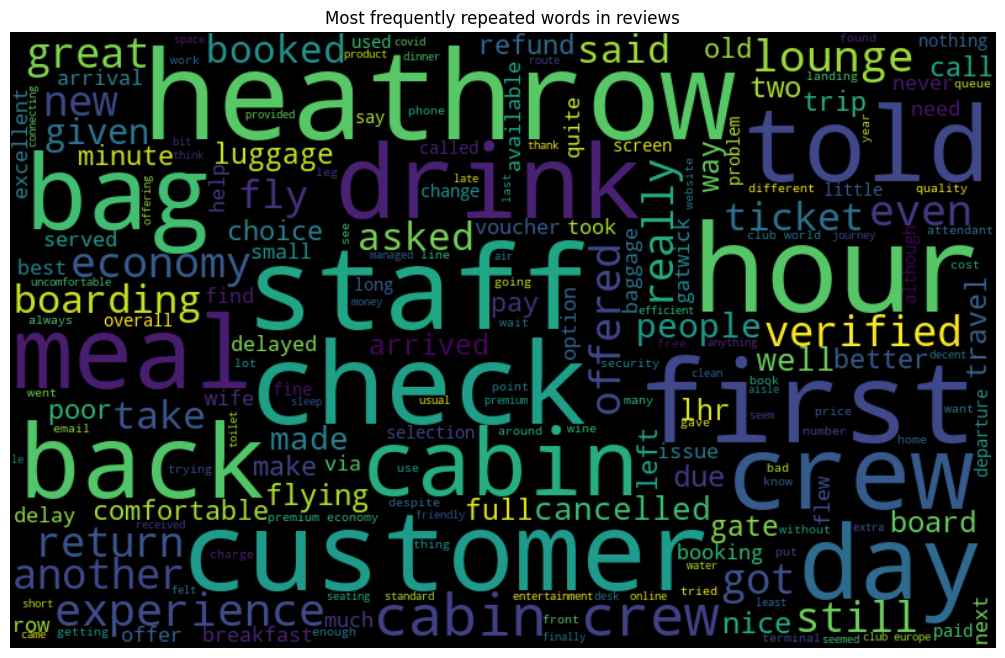

In [60]:
# visualize the frequent words
all_words = " ".join([word for sentence in df['cleaned_reviews'] for word in sentence.split() if word not in stopwords])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.title("Most frequently repeated words in reviews")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [71]:
# create FreqDist object from text data
fdist = FreqDist(nltk.word_tokenize(all_words))

In [72]:
d = pd.DataFrame({'words': list(fdist.keys()),
                 'Count': list(fdist.values())})
d.head(10)

,words,Count
0,boarding,270
1,delayed,154
2,due,167
3,late,133
4,arrival,116
5,incoming,3
6,communication,8
7,ground,77
8,staff,399
9,excellent,103


In [ ]:
d=d.nlargest(columns='Count',n=10)

In [74]:
px.bar(d,x='words', y='Count',color="words",title='top words used by reviewers')

In [78]:
d

,words,Count
139,hour,520
12,crew,517
68,cabin,439
8,staff,399
168,would,381
52,check,362
120,get,349
265,heathrow,335
327,customer,300
71,drink,283


In [107]:
d=FreqDist(df.rating)

In [108]:
d = pd.DataFrame({'rating': list(d.keys()),
                 'Count': list(d.values())})
d.head(10)

,rating,Count
0,5,64
1,9,81
2,10,104
3,2,111
4,4,60
5,3,98
6,1,299
7,8,79
8,6,42
9,7,62


In [115]:
d=d.nlargest(columns='Count',n=10)#.sort_values(by=['rating'])

In [116]:
d

,rating,Count
6,1,299
3,2,111
2,10,104
5,3,98
1,9,81
7,8,79
0,5,64
9,7,62
4,4,60
8,6,42


In [117]:
px.bar(d,x='rating', y='Count',color="rating",title='Count of each ratings')